# A) Importing the Libraries

In [1]:
from scipy.io import arff
import pandas as pd
from mnist import MNIST
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from package import (data_balancer, MultiLayerPerceptron, softmax, sigmoid, Loss_Perceptron,Weight_Initialization,
                        KNeighbors, forest, svm, perceptron)
from sklearn.metrics import (confusion_matrix, recall_score, precision_score, roc_auc_score,
                                accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix,
                                roc_curve, auc)
from sklearn.model_selection import (cross_val_score, cross_validate, train_test_split)
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time
sns.set_style('dark')

# B) Loading Data Sets

### Bankruptcy Data of the Polish Companies

In [2]:
data = arff.loadarff('data/1year.arff')
polish_1 = pd.DataFrame(data[0])
data = arff.loadarff('data/2year.arff')
polish_2 = pd.DataFrame(data[0])
data = arff.loadarff('data/3year.arff')
polish_3 = pd.DataFrame(data[0])
data = arff.loadarff('data/4year.arff')
polish_4 = pd.DataFrame(data[0])
data = arff.loadarff('data/5year.arff')
polish_5 = pd.DataFrame(data[0])

In [3]:
polish_1['class'] = polish_1['class'].apply(lambda x: int(x))
polish_2['class'] = polish_2['class'].apply(lambda x: int(x))
polish_3['class'] = polish_3['class'].apply(lambda x: int(x))
polish_4['class'] = polish_4['class'].apply(lambda x: int(x))

# C) Performance Before Improvement

### Fashion MNIST Data Set with Different Balance Ratios

In [4]:
np.random.seed(60) # reproducability
mndata = MNIST('./mnist-fashion')

# read training images and corresponding labels
tr_images, tr_labels = mndata.load_training()
# read test images and corresponding labels
tt_images, tt_labels = mndata.load_testing()

# convert lists into numpy format and apply normalization
tr_images = np.array(tr_images) / 255. # shape (60000, 784)
tr_labels = np.array(tr_labels)         # shape (60000,)
tt_images = np.array(tt_images) / 255. # shape (10000, 784)
tt_labels = np.array(tt_labels)         # shape (10000,)

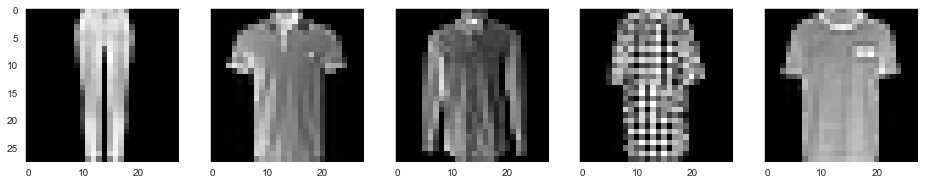

In [5]:
f, axes = plt.subplots(1, 5, figsize=(16,8), sharey=True, sharex=True)
for i in range(5):
    sample_number = np.random.randint(1,60000)
    img = (tr_images[sample_number])
    img = img.reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
plt.show()

In [6]:
X_train_50, y_train_50, Balance, Balance_Changed_50_tr = data_balancer(tr_images, tr_labels, 0, 6, 0.5, 0.5)
X_test_50, y_test_50, Balance, Balance_Changed_50_tt = data_balancer(tt_images, tt_labels, 0, 6, 0.5, 0.5)

X_train_70, y_train_70, Balance, Balance_Changed_70_tr = data_balancer(tr_images, tr_labels, 0, 6, 0.7, 0.3)
X_test_70, y_test_70, Balance, Balance_Changed_70_tt = data_balancer(tt_images, tt_labels, 0, 6, 0.7, 0.3)

X_train_90, y_train_90, Balance, Balance_Changed_90_tr = data_balancer(tr_images, tr_labels, 0, 6, 0.9, 0.1)
X_test_90, y_test_90, Balance, Balance_Changed_90_tt = data_balancer(tt_images, tt_labels, 0, 6, 0.9, 0.1)

X_train_95, y_train_95, Balance, Balance_Changed_95_tr = data_balancer(tr_images, tr_labels, 0, 6, 0.95, 0.05)
X_test_95, y_test_95, Balance, Balance_Changed_95_tt = data_balancer(tt_images, tt_labels, 0, 6, 0.95, 0.05)

print(f'{(Balance_Changed_50_tr,Balance_Changed_50_tt)} \n\
{(Balance_Changed_70_tr,Balance_Changed_70_tt)} \n\
{(Balance_Changed_90_tr,Balance_Changed_90_tt)} \n\
{(Balance_Changed_95_tr,Balance_Changed_95_tt)}')

((0.5, 0.5), (0.5, 0.5)) 
((0.7, 0.3), (0.7, 0.3)) 
((0.9, 0.1), (0.9, 0.1)) 
((0.95, 0.05), (0.95, 0.05))


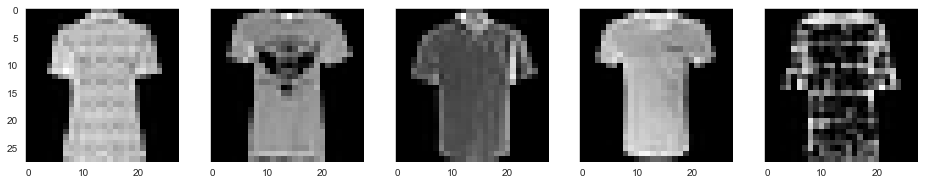

In [7]:
f, axes = plt.subplots(1, 5, figsize=(16,8), sharey=True, sharex=True)
for i in range(5):
    sample_number = np.random.randint(1,6000)
    img = (X_train_70[sample_number])
    img = img.reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
plt.show()

## On Fashion MNIST

### 1) Multilayer Perceptron

In [8]:
Accuracy_Train_25_50, Accuracy_Test_25_50, W1_25_50, W2_25_50, b1_25_50, b2_25_50, classes_train_25_50, classes_test_25_50 = MultiLayerPerceptron(X_train_50, y_train_50, X_test_50, y_test_50, hidden_layer_units=25, alpha=0.03, epoch=10)

Accuracy_Train_25_70, Accuracy_Test_25_70, W1_25_70, W2_25_70, b1_25_70, b2_25_70, classes_train_25_70, classes_test_25_70 = MultiLayerPerceptron(X_train_70, y_train_70, X_test_70, y_test_70, hidden_layer_units=25, alpha=0.03, epoch=10)

Accuracy_Train_25_90, Accuracy_Test_25_90, W1_25_90, W2_25_90, b1_25_90, b2_25_90, classes_train_25_90, classes_test_25_90 = MultiLayerPerceptron(X_train_90, y_train_90, X_test_90, y_test_90, hidden_layer_units=25, alpha=0.03, epoch=10)

Accuracy_Train_25_95, Accuracy_Test_25_95, W1_25_95, W2_25_95, b1_25_95, b2_25_95, classes_train_25_95, classes_test_25_95 = MultiLayerPerceptron(X_train_95, y_train_95, X_test_95, y_test_95, hidden_layer_units=25, alpha=0.03, epoch=10)

for Epoch 0, Training Accuracy: 0.852 & Testing Accuracy: 0.842, Time per Epoch: 1.80 seconds
for Epoch 9, Training Accuracy: 0.886 & Testing Accuracy: 0.852, Time per Epoch: 1.98 seconds
for Epoch 0, Training Accuracy: 0.878 & Testing Accuracy: 0.852, Time per Epoch: 1.38 seconds
for Epoch 9, Training Accuracy: 0.904 & Testing Accuracy: 0.871, Time per Epoch: 1.63 seconds
for Epoch 0, Training Accuracy: 0.900 & Testing Accuracy: 0.900, Time per Epoch: 1.31 seconds
for Epoch 9, Training Accuracy: 0.956 & Testing Accuracy: 0.945, Time per Epoch: 1.33 seconds
for Epoch 0, Training Accuracy: 0.950 & Testing Accuracy: 0.950, Time per Epoch: 1.21 seconds
for Epoch 9, Training Accuracy: 0.950 & Testing Accuracy: 0.950, Time per Epoch: 1.12 seconds


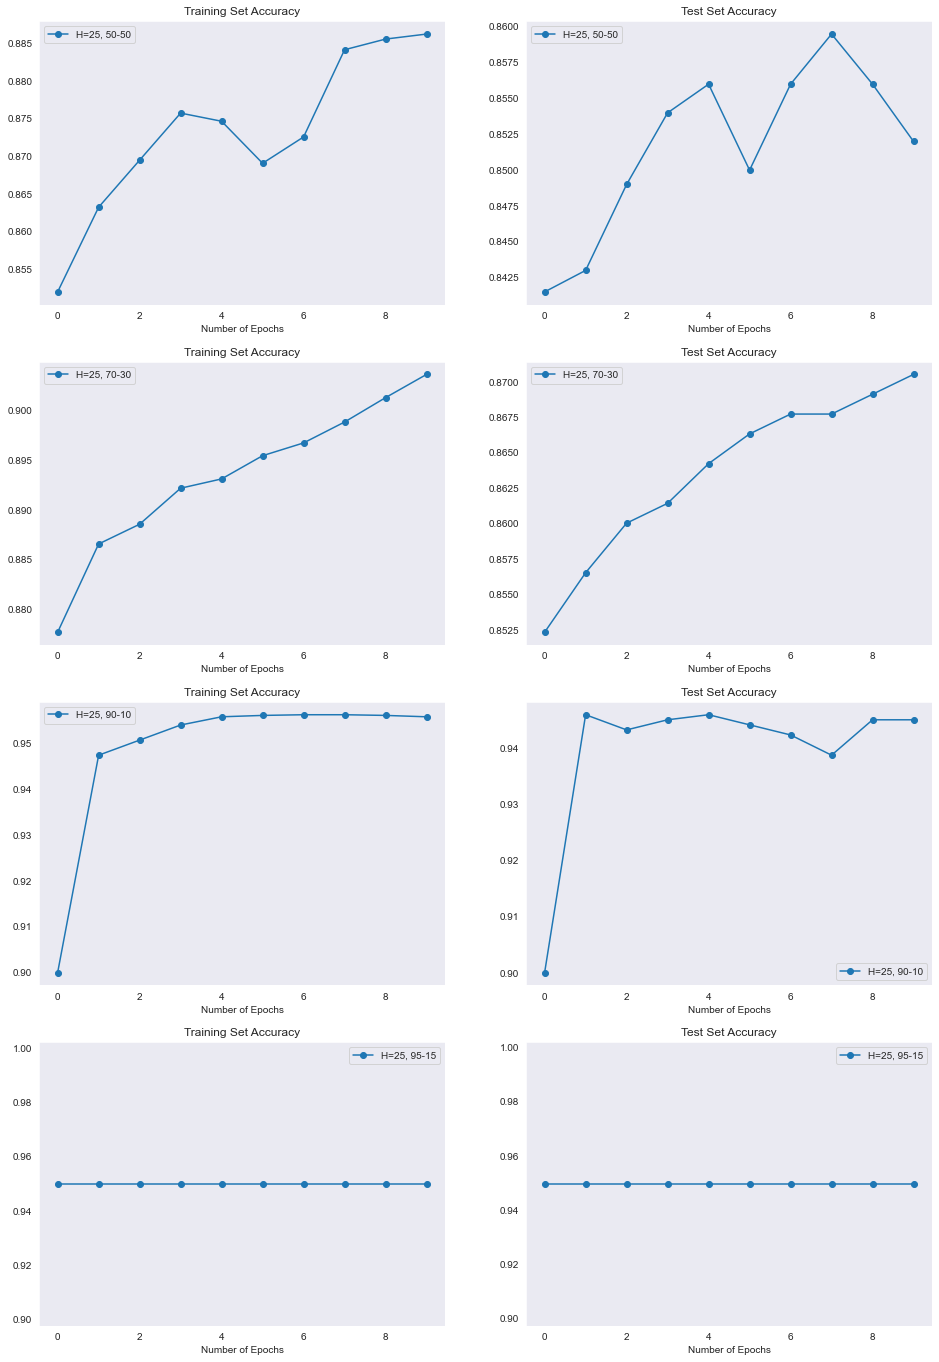

In [9]:
f, ax = plt.subplots(4,2,figsize=(16, 24))
Accuracy_List = [Accuracy_Train_25_50, Accuracy_Test_25_50,
                 Accuracy_Train_25_70, Accuracy_Test_25_70,
                 Accuracy_Train_25_90, Accuracy_Test_25_90,
                 Accuracy_Train_25_95, Accuracy_Test_25_95]
Accuracy_Label = ['H=25, 50-50','H=25, 50-50','H=25, 70-30','H=25, 70-30',
                  'H=25, 90-10','H=25, 90-10','H=25, 95-15','H=25, 95-15']

for i in range(4):
    for j in range(2):
        ax[i,j].plot(Accuracy_List[2*i+j], 'o-', label=Accuracy_Label[2*i+j])
        if j%2==0:
            ax[i,j].set(title='Training Set Accuracy', xlabel='Number of Epochs')
        else:
            ax[i,j].set(title='Test Set Accuracy',xlabel='Number of Epochs')
        ax[i,j].legend()

plt.show()

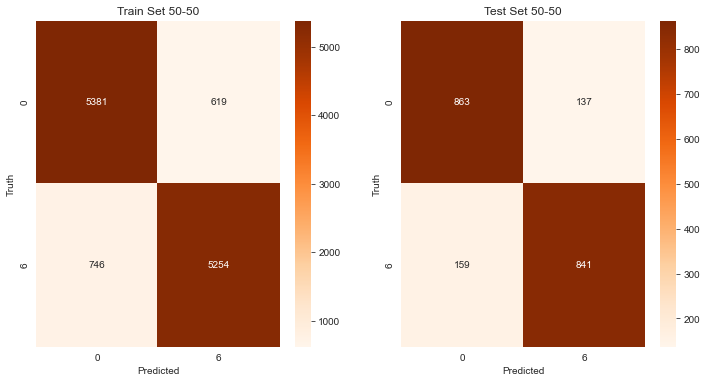

In [10]:
f, ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(confusion_matrix(y_test_50, classes_test_25_50), fmt='.0f', annot=True,ax=ax[1],
xticklabels=[0,6], yticklabels=[0,6], cmap = 'Oranges');
ax[1].set(xlabel = 'Predicted', ylabel='Truth',title='Test Set 50-50', ylim=(2,0))
sns.heatmap(confusion_matrix(y_train_50, classes_train_25_50), fmt='.0f', annot=True,ax=ax[0],
xticklabels=[0,6], yticklabels=[0,6], cmap = 'Oranges');
ax[0].set(xlabel = 'Predicted', ylabel='Truth',title='Train Set 50-50', ylim=(2,0))
plt.show()

In [11]:
print(f'for 50/50 - Recall: {recall_score(y_test_50, classes_test_25_50, pos_label=6):.3f}, Precision: {precision_score(y_test_50, classes_test_25_50, pos_label=6):.3f}, ROC-AUC Score: {roc_auc_score(y_test_50, classes_test_25_50):.3f}')
print(f'for 70/30 - Recall: {recall_score(y_test_70, classes_test_25_70, pos_label=6):.3f}, Precision: {precision_score(y_test_70, classes_test_25_70, pos_label=6):.3f}, ROC-AUC Score: {roc_auc_score(y_test_70, classes_test_25_70):.3f}')
print(f'for 90/10 - Recall: {recall_score(y_test_90, classes_test_25_90, pos_label=6):.3f}, Precision: {precision_score(y_test_90, classes_test_25_90, pos_label=6):.3f}, ROC-AUC Score: {roc_auc_score(y_test_90, classes_test_25_90):.3f}')
print(f'for 95/ 5 - Recall: {recall_score(y_test_95, classes_test_25_95, pos_label=6):.3f}, Precision: {precision_score(y_test_95, classes_test_25_95, pos_label=6):.3f}, ROC-AUC Score: {roc_auc_score(y_test_95, classes_test_25_95):.3f}')

for 50/50 - Recall: 0.841, Precision: 0.860, ROC-AUC Score: 0.852
for 70/30 - Recall: 0.646, Precision: 0.894, ROC-AUC Score: 0.806
for 90/10 - Recall: 0.550, Precision: 0.847, ROC-AUC Score: 0.769
for 95/ 5 - Recall: 0.000, Precision: 0.000, ROC-AUC Score: 0.500


In [12]:
#Performance Metrics of Multilayer Perceptron on Test Set
Accuracy_List_MLP = [Accuracy_Test_25_50[-1], Accuracy_Test_25_70[-1], Accuracy_Test_25_90[-1], Accuracy_Test_25_95[-1]]
Recall_List_MLP = [recall_score(y_test_50, classes_test_25_50, pos_label=6), 
                   recall_score(y_test_70, classes_test_25_70, pos_label=6),
                   recall_score(y_test_90, classes_test_25_90, pos_label=6),
                   recall_score(y_test_95, classes_test_25_95, pos_label=6)]
Precision_List_MLP = [precision_score(y_test_50, classes_test_25_50, pos_label=6), 
                      precision_score(y_test_70, classes_test_25_70, pos_label=6),
                      precision_score(y_test_90, classes_test_25_90, pos_label=6),
                      precision_score(y_test_95, classes_test_25_95, pos_label=6)]   
AUC_List_MLP = [roc_auc_score(y_test_50, classes_test_25_50), 
                roc_auc_score(y_test_70, classes_test_25_70),
                roc_auc_score(y_test_90, classes_test_25_90),
                roc_auc_score(y_test_95, classes_test_25_95)]   

### 2) K-Neighbours Classifier

In [13]:
"""
print("50 Case")
KNeighbors(X_train_50, y_train_50, X_test_50, y_test_50)
print("70 Case")
KNeighbors(X_train_70, y_train_70, X_test_70, y_test_70)
print("90 Case")
KNeighbors(X_train_90, y_train_90, X_test_90, y_test_90)
print("95 Case")
KNeighbors(X_train_95, y_train_95, X_test_95, y_test_95)
"""
Accuracy_50_value, Roc_Auc_50_value, Misclassified_Count_50_value = KNeighbors(X_train_50, y_train_50, X_test_50, y_test_50)
Accuracy_70_value, Roc_Auc_70_value, Misclassified_Count_70_value = KNeighbors(X_train_70, y_train_70, X_test_70, y_test_70)
Accuracy_90_value, Roc_Auc_90_value, Misclassified_Count_90_value = KNeighbors(X_train_90, y_train_90, X_test_90, y_test_90)
Accuracy_95_value, Roc_Auc_95_value, Misclassified_Count_95_value = KNeighbors(X_train_95, y_train_95, X_test_95, y_test_95)

KNN_AUC = [Roc_Auc_50_value, Roc_Auc_70_value, Roc_Auc_90_value, Roc_Auc_95_value]
KNN_Accuracy = [Accuracy_50_value, Accuracy_70_value, Accuracy_90_value, Accuracy_95_value]

### 3) Random Forest Classifier

In [14]:
#Implement the Random Forest Algorithm for Different Rates of Dividents
"""
print("50 Case")
forest(X_train_50, y_train_50, X_test_50, y_test_50)
print("70 Case")
forest(X_train_70, y_train_70, X_test_70, y_test_70)
print("90 Case")
forest(X_train_90, y_train_90, X_test_90, y_test_90)
print("95 Case")
forest(X_train_95, y_train_95, X_test_95, y_test_95)
"""
Accuracy_50_value, Roc_Auc_50_value, Misclassified_Count_50_value = forest(X_train_50, y_train_50, X_test_50, y_test_50)
Accuracy_70_value, Roc_Auc_70_value, Misclassified_Count_70_value = forest(X_train_70, y_train_70, X_test_70, y_test_70)
Accuracy_90_value, Roc_Auc_90_value, Misclassified_Count_90_value = forest(X_train_90, y_train_90, X_test_90, y_test_90)
Accuracy_95_value, Roc_Auc_95_value, Misclassified_Count_95_value = forest(X_train_95, y_train_95, X_test_95, y_test_95)

RF_AUC = [Roc_Auc_50_value, Roc_Auc_70_value, Roc_Auc_90_value, Roc_Auc_95_value]
RF_Accuracy = [Accuracy_50_value, Accuracy_70_value, Accuracy_90_value, Accuracy_95_value]

### 4) Support Vector Machine Classifier

In [15]:
#Implement the Support Vector Machine Algorithm for Different Rates of Dividents
"""
print("50 Case")
svm(X_train_50, y_train_50, X_test_50, y_test_50)
print("70 Case")
svm(X_train_70, y_train_70, X_test_70, y_test_70)
print("90 Case")
svm(X_train_90, y_train_90, X_test_90, y_test_90)
print("95 Case")
svm(X_train_95, y_train_95, X_test_95, y_test_95)
"""

Accuracy_50_value, Roc_Auc_50_value, Misclassified_Count_50_value = svm(X_train_50, y_train_50, X_test_50, y_test_50)
Accuracy_70_value, Roc_Auc_70_value, Misclassified_Count_70_value = svm(X_train_70, y_train_70, X_test_70, y_test_70)
Accuracy_90_value, Roc_Auc_90_value, Misclassified_Count_90_value = svm(X_train_90, y_train_90, X_test_90, y_test_90)
Accuracy_95_value, Roc_Auc_95_value, Misclassified_Count_95_value = svm(X_train_95, y_train_95, X_test_95, y_test_95)

SVM_AUC = [Roc_Auc_50_value, Roc_Auc_70_value, Roc_Auc_90_value, Roc_Auc_95_value]
SVM_Accuracy = [Accuracy_50_value, Accuracy_70_value, Accuracy_90_value, Accuracy_95_value]


### 5) Perceptron Classifier

In [16]:
"""
#Implement the Perceptron Algorithm for Different Rates of Dividents
print("50 Case")
perceptron(X_train_50, y_train_50, X_test_50, y_test_50)
print("70 Case")
perceptron(X_train_70, y_train_70, X_test_70, y_test_70)
print("90 Case")
perceptron(X_train_90, y_train_90, X_test_90, y_test_90)
print("95 Case")
perceptron(X_train_95, y_train_95, X_test_95, y_test_95)
"""

Accuracy_50_value, Roc_Auc_50_value, Misclassified_Count_50_value = perceptron(X_train_50, y_train_50, X_test_50, y_test_50)
Accuracy_70_value, Roc_Auc_70_value, Misclassified_Count_70_value = perceptron(X_train_70, y_train_70, X_test_70, y_test_70)
Accuracy_90_value, Roc_Auc_90_value, Misclassified_Count_90_value = perceptron(X_train_90, y_train_90, X_test_90, y_test_90)
Accuracy_95_value, Roc_Auc_95_value, Misclassified_Count_95_value = perceptron(X_train_95, y_train_95, X_test_95, y_test_95)

SLP_AUC = [Roc_Auc_50_value, Roc_Auc_70_value, Roc_Auc_90_value, Roc_Auc_95_value]
SLP_Accuracy = [Accuracy_50_value, Accuracy_70_value, Accuracy_90_value, Accuracy_95_value]

In [17]:
AUC_DF = pd.concat([pd.Series(AUC_List_MLP, name='MLP'),
                    pd.Series(SLP_AUC, name='SLP'),
                    pd.Series(RF_AUC, name='RF'), 
                    pd.Series(SVM_AUC, name='SVM'), 
                    pd.Series(KNN_AUC, name='KNN'),
                    pd.Series(['50-50', '70-30', '90-10', '95-5'], name='Balance')], axis=1)

AUC_DF.set_index('Balance', inplace=True)
display(AUC_DF)

,MLP,SLP,RF,SVM,KNN
Balance,,,,,
50-50,0.852000,0.824000,0.836000,0.860000,0.821000
70-30,0.806344,0.829429,0.798182,0.834967,0.793650
90-10,0.769275,0.679680,0.759261,0.797311,0.790811
95-5,0.500000,0.509434,0.725415,0.777519,0.809755


In [18]:
Accuracy_DF = pd.concat([pd.Series(Accuracy_List_MLP, name='MLP'),
                    pd.Series(SLP_Accuracy, name='SLP'),
                    pd.Series(RF_Accuracy, name='RF'), 
                    pd.Series(SVM_Accuracy, name='SVM'), 
                    pd.Series(KNN_Accuracy, name='KNN'),
                    pd.Series(['50-50', '70-30', '90-10', '95-5'], name='Balance')], axis=1)

Accuracy_DF.set_index('Balance', inplace=True)
display(Accuracy_DF)

,MLP,SLP,RF,SVM,KNN
Balance,,,,,
50-50,0.852000,0.824000,0.836000,0.860000,0.821000
70-30,0.870539,0.837649,0.862841,0.876137,0.831351
90-10,0.945095,0.935194,0.948695,0.937894,0.926193
95-5,0.949668,0.950617,0.970560,0.967711,0.961064


## On Polish Bankruptcy Data Set

### Handling Missing Values in the Data

In [4]:
polish_1_mean_filled = polish_1.fillna(polish_1.mean(axis=0), axis=0)
y_1 = polish_1_mean_filled['class']
X_1 = polish_1_mean_filled.drop('class', axis=1)
polish_2_mean_filled = polish_2.fillna(polish_2.mean(axis=0), axis=0)
y_2 = polish_2_mean_filled['class']
X_2 = polish_2_mean_filled.drop('class', axis=1)
polish_3_mean_filled = polish_3.fillna(polish_3.mean(axis=0), axis=0)
y_3 = polish_3_mean_filled['class']
X_3 = polish_3_mean_filled.drop('class', axis=1)
polish_4_mean_filled = polish_4.fillna(polish_4.mean(axis=0), axis=0)
y_4 = polish_4_mean_filled['class']
X_4 = polish_4_mean_filled.drop('class', axis=1)

### 1) Multilayer Perceptron Classifier

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=25, verbose=False)

scores = cross_validate(mlp, X_1, y_1, cv=10, scoring='roc_auc')
MLP_1_AUC_Mean = scores["test_score"].mean()
MLP_1_AUC_Std = scores["test_score"].std()

scores = cross_validate(mlp, X_2, y_2, cv=10, scoring='roc_auc')
MLP_2_AUC_Mean = scores["test_score"].mean()
MLP_2_AUC_Std = scores["test_score"].std()

scores = cross_validate(mlp, X_3, y_3, cv=10, scoring='roc_auc')
MLP_3_AUC_Mean = scores["test_score"].mean()
MLP_3_AUC_Std = scores["test_score"].std()


scores = cross_validate(mlp, X_4, y_4, cv=10, scoring='roc_auc')
MLP_4_AUC_Mean = scores["test_score"].mean()
MLP_4_AUC_Std = scores["test_score"].std()

MLP_AUC_Mean = [MLP_1_AUC_Mean, MLP_2_AUC_Mean, MLP_3_AUC_Mean, MLP_4_AUC_Mean]
MLP_AUC_STD = [MLP_1_AUC_Std, MLP_2_AUC_Std, MLP_3_AUC_Std, MLP_4_AUC_Std]

### 2) K-Neighbours Classifier

In [6]:
knn=KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')

scores = cross_validate(knn, X_1, y_1, cv=10, scoring='roc_auc')
knn_1_AUC_Mean = scores["test_score"].mean()
knn_1_AUC_Std = scores["test_score"].std()

scores = cross_validate(knn, X_2, y_2, cv=10, scoring='roc_auc')
knn_2_AUC_Mean = scores["test_score"].mean()
knn_2_AUC_Std = scores["test_score"].std()

scores = cross_validate(knn, X_3, y_3, cv=10, scoring='roc_auc')
knn_3_AUC_Mean = scores["test_score"].mean()
knn_3_AUC_Std = scores["test_score"].std()


scores = cross_validate(knn, X_4, y_4, cv=10, scoring='roc_auc')
knn_4_AUC_Mean = scores["test_score"].mean()
knn_4_AUC_Std = scores["test_score"].std()

KNN_AUC_Mean = [knn_1_AUC_Mean, knn_2_AUC_Mean, knn_3_AUC_Mean, knn_4_AUC_Mean]
KNN_AUC_STD = [knn_1_AUC_Std, knn_2_AUC_Std, knn_3_AUC_Std, knn_4_AUC_Std]

### 3) Random Forest Classifier

In [7]:
myforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 10, random_state = 60)

scores = cross_validate(myforest, X_1, y_1, cv=10, scoring='roc_auc')
myforest_1_AUC_Mean = scores["test_score"].mean()
myforest_1_AUC_Std = scores["test_score"].std()

scores = cross_validate(myforest, X_2, y_2, cv=10, scoring='roc_auc')
myforest_2_AUC_Mean = scores["test_score"].mean()
myforest_2_AUC_Std = scores["test_score"].std()

scores = cross_validate(myforest, X_3, y_3, cv=10, scoring='roc_auc')
myforest_3_AUC_Mean = scores["test_score"].mean()
myforest_3_AUC_Std = scores["test_score"].std()


scores = cross_validate(myforest, X_4, y_4, cv=10, scoring='roc_auc')
myforest_4_AUC_Mean = scores["test_score"].mean()
myforest_4_AUC_Std = scores["test_score"].std()

RF_AUC_Mean = [myforest_1_AUC_Mean, myforest_2_AUC_Mean, myforest_3_AUC_Mean, myforest_4_AUC_Mean]
RF_AUC_STD = [myforest_1_AUC_Std, myforest_2_AUC_Std, myforest_3_AUC_Std, myforest_4_AUC_Std]

In [23]:
#scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
#scores = cross_validate(myforest, X, y, cv=10, scoring='roc_auc')
#print(f'{scores["test_score"].mean():.3f}, {scores["test_score"].std():.3f}')

In [24]:
#from sklearn.metrics import SCORERS
#sorted(SCORERS.keys())

### 4) Support Vector Machine Classifier

In [7]:
mysvm = SVC(kernel = 'poly', C = 4, random_state =60, probability = True)

scores = cross_validate(mysvm, X_1, y_1, cv=5, scoring='roc_auc')
mysvm_1_AUC_Mean = scores["test_score"].mean()
mysvm_1_AUC_Std = scores["test_score"].std()

scores = cross_validate(mysvm, X_2, y_2, cv=5, scoring='roc_auc')
mysvm_2_AUC_Mean = scores["test_score"].mean()
mysvm_2_AUC_Std = scores["test_score"].std()

scores = cross_validate(mysvm, X_3, y_3, cv=5, scoring='roc_auc')
mysvm_3_AUC_Mean = scores["test_score"].mean()
mysvm_3_AUC_Std = scores["test_score"].std()


scores = cross_validate(mysvm, X_4, y_4, cv=5, scoring='roc_auc')
mysvm_4_AUC_Mean = scores["test_score"].mean()
mysvm_4_AUC_Std = scores["test_score"].std()

SVM_AUC_Mean = [mysvm_1_AUC_Mean, mysvm_2_AUC_Mean, mysvm_3_AUC_Mean, mysvm_4_AUC_Mean]
SVM_AUC_STD = [mysvm_1_AUC_Std, mysvm_2_AUC_Std, mysvm_3_AUC_Std, mysvm_4_AUC_Std]

### 5) Perceptron Classifier

In [8]:
myperceptron = Perceptron(penalty = 'elasticnet', max_iter = 30, eta0 = 0.001, random_state = 60)

scores = cross_validate(myperceptron, X_1, y_1, cv=10, scoring='roc_auc')
myperceptron_1_AUC_Mean = scores["test_score"].mean()
myperceptron_1_AUC_Std = scores["test_score"].std()

scores = cross_validate(myperceptron, X_2, y_2, cv=10, scoring='roc_auc')
myperceptron_2_AUC_Mean = scores["test_score"].mean()
myperceptron_2_AUC_Std = scores["test_score"].std()

scores = cross_validate(myperceptron, X_3, y_3, cv=10, scoring='roc_auc')
myperceptron_3_AUC_Mean = scores["test_score"].mean()
myperceptron_3_AUC_Std = scores["test_score"].std()


scores = cross_validate(myperceptron, X_4, y_4, cv=10, scoring='roc_auc')
myperceptron_4_AUC_Mean = scores["test_score"].mean()
myperceptron_4_AUC_Std = scores["test_score"].std()

SLP_AUC_Mean = [myperceptron_1_AUC_Mean, myperceptron_2_AUC_Mean, myperceptron_3_AUC_Mean, myperceptron_4_AUC_Mean]
SLP_AUC_STD = [myperceptron_1_AUC_Std, myperceptron_2_AUC_Std, myperceptron_3_AUC_Std, myperceptron_4_AUC_Std]

In [9]:
Polish_AUC_DF = pd.concat([pd.Series(MLP_AUC_Mean, name='MLP Mean'),
                    pd.Series(MLP_AUC_STD, name='MLP STD'),
                    pd.Series(SLP_AUC_Mean, name='SLP Mean'),
                    pd.Series(SLP_AUC_STD, name='SLP STD'),
                    pd.Series(RF_AUC_Mean, name='RF Mean'),
                    pd.Series(RF_AUC_STD, name='RF STD'), 
#                    pd.Series(SVM_AUC_Mean, name='SVM Mean'),
#                    pd.Series(SVM_AUC_STD, name='SVM STD'),
                    pd.Series(KNN_AUC_Mean, name='KNN Mean'),
                    pd.Series(KNN_AUC_STD, name='KNN STD'),
                    pd.Series(['Data Set 1', 'Data Set 2', 'Data Set 3', 'Data Set 4'], name='Data Sets')], axis=1)

Polish_AUC_DF.set_index('Data Sets', inplace=True)
display(Polish_AUC_DF)

,MLP Mean,MLP STD,SLP Mean,SLP STD,RF Mean,RF STD,KNN Mean,KNN STD
Data Sets,,,,,,,,
Data Set 1,0.607223,0.078183,0.412009,0.103531,0.863533,0.058515,0.646626,0.066675
Data Set 2,0.548830,0.084784,0.459172,0.072766,0.804308,0.080974,0.574715,0.043737
Data Set 3,0.516081,0.053403,0.522207,0.082441,0.794093,0.060632,0.579183,0.054846
Data Set 4,0.556368,0.048025,0.522034,0.106883,0.794377,0.061809,0.597981,0.044279


# D) Performance After Improvement